# Vector Fast Fourier Transform (VFFT)

The incident field is an vector field (Ex, Ey) and it is propagated and converted to (Ex,Ey,Ez)

In [8]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 250


In [3]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees


In [4]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


In [5]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY


## XY scheme

In [21]:
size = 64 * um
x0 = np.linspace(-size / 2, size / 2, 1024)
y0 = np.linspace(-size / 2, size / 2, 1024)

wavelength = 0.6328 * um


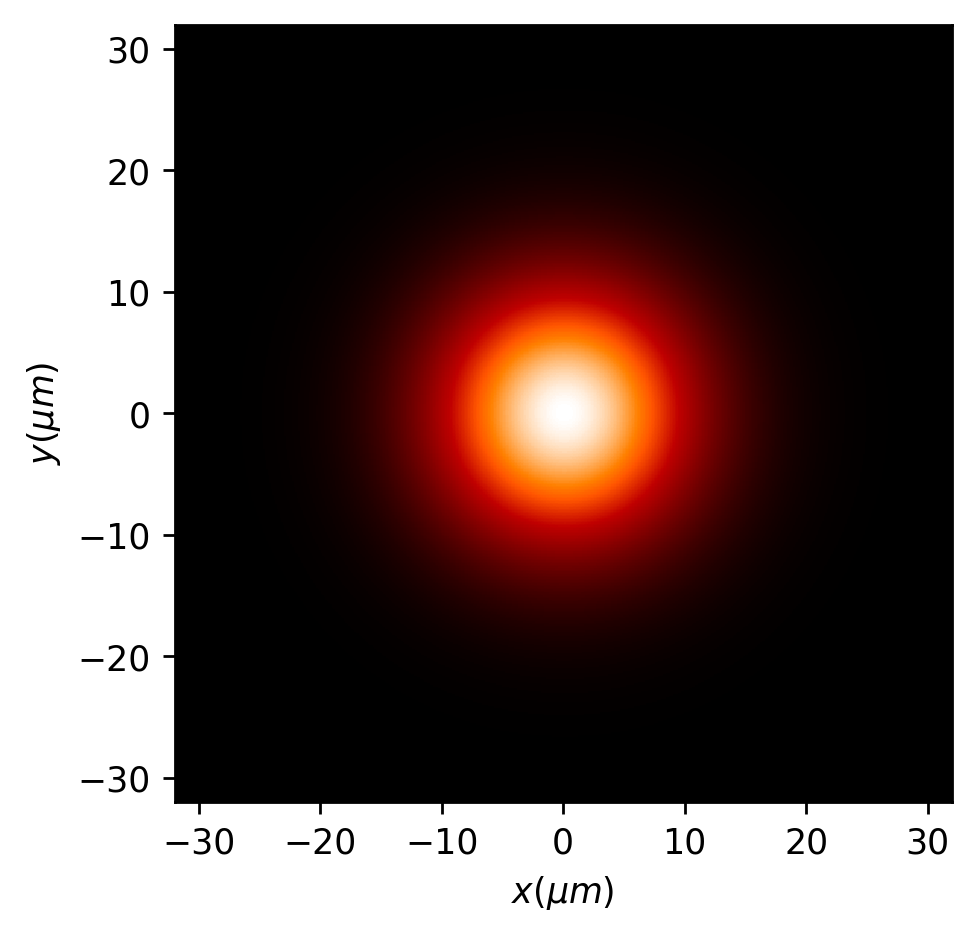

In [22]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0), w0=(16 * um, 16 * um), z0=0 * um, A=1, theta=0. * degrees, phi=0 * degrees)

u0.draw();


In [23]:
radius = 8*um
t = Scalar_mask_XY(x0, y0, wavelength)
t.circle(r0=(0, 0), radius=radius)


In [24]:
u1 = t*u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 0))


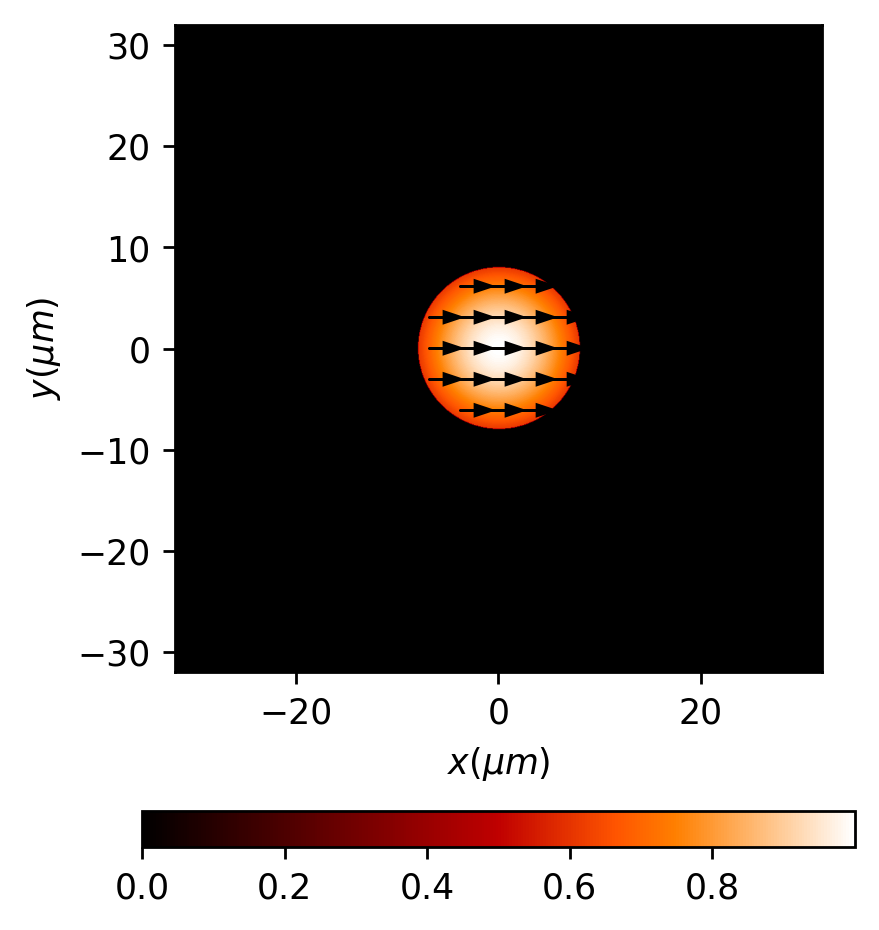

In [25]:
EM1.draw(kind='ellipses', amplification=0.5,  color_line='k', line_width=0.75,  num_ellipses=(21, 21))


In [48]:
EM2 = EM1.VFFT(radius=64*um, focal=10*um, remove0=False, n=1, new_field=True, has_draw=False)


In [59]:
x_resample = 8
EM2.cut_resample([-x_resample, x_resample], [-x_resample, x_resample],
                 num_points=(1024, 1024))


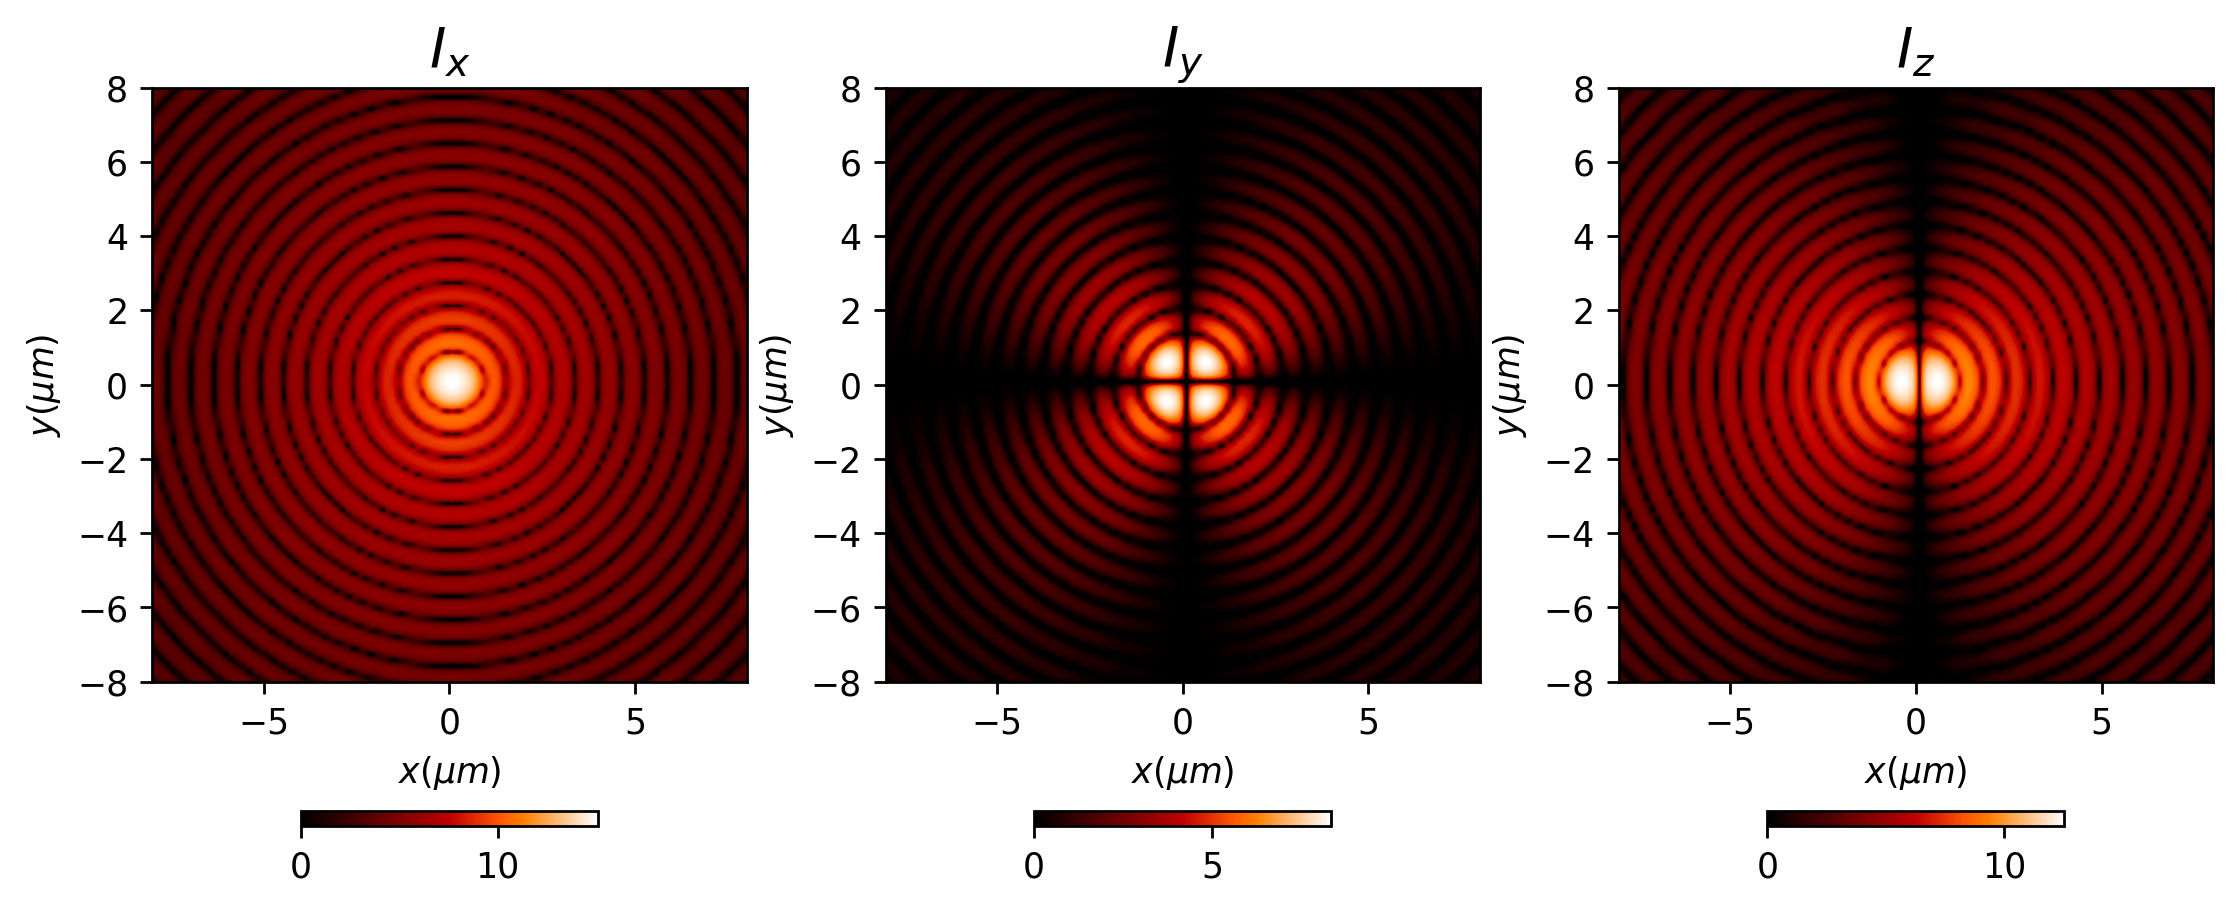

In [60]:
EM2.draw('intensities', logarithm=1e-1);


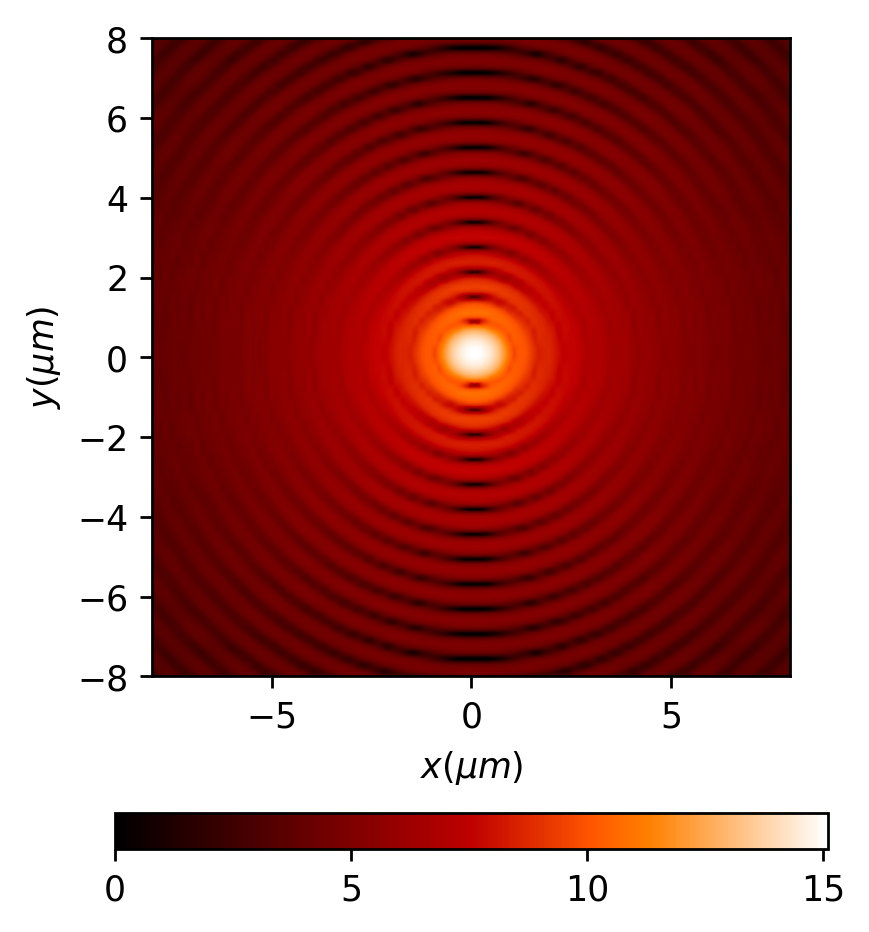

In [61]:
EM2.draw('intensity', logarithm=1e-1)


This result can be compared to the scalar FFT result.

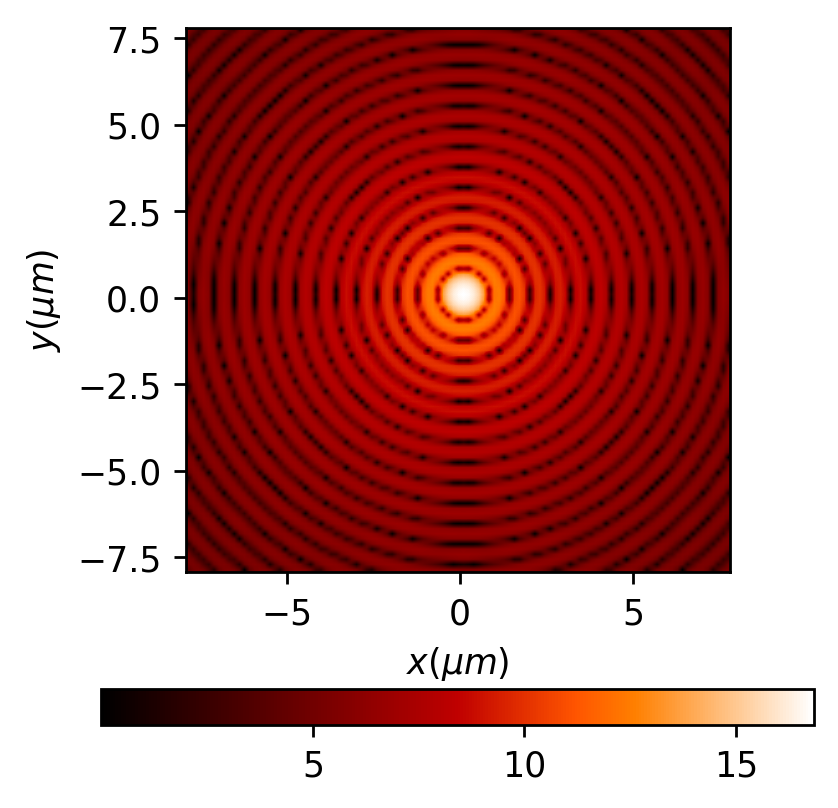

In [58]:
u_fft = u1.fft(z=15 * um, new_field=True, remove0=False)
u_fft.cut_resample(x_limits=(-x_resample, x_resample), y_limits=(-x_resample, x_resample))
u_fft.draw(logarithm=1e-2, has_colorbar='horizontal')
